In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Recommendation Systems-1 Rule based or content based recommendation systems

In [2]:
#Importing the dataset
data = pd.read_csv('/kaggle/input/rule-based-systems/data.csv',encoding='unicode_escape')

In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [6]:
#dropping the null values
data_clean = data.dropna(subset=['Description'])

In [7]:
data_clean.shape

(540455, 8)

In [8]:
#checking the descrption of the dataset
data_clean.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
#removing the negitive values
data_clean = data_clean[data_clean['Quantity'] > 0]

In [10]:
data_clean.describe()

,Quantity,UnitPrice,CustomerID
count,530693.000000,530693.000000,397924.000000
mean,10.605819,3.861599,15294.315171
std,156.637853,41.833162,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


### Popular items globally

In [11]:
#Visualzing top products globally 
global_popular = data_clean.pivot_table(index= ['StockCode','Description'],values = 'Quantity', aggfunc='sum').sort_values(by='Quantity',ascending=False)
print('Top 10 popular items globally')
global_popular.head(10)

Top 10 popular items globally


,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
85099B,JUMBO BAG RED RETROSPOT,48478
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603
22197,POPCORN HOLDER,36761
84879,ASSORTED COLOUR BIRD ORNAMENT,36461
21212,PACK OF 72 RETROSPOT CAKE CASES,36419
23084,RABBIT NIGHT LIGHT,30788


Text(0.5, 1.0, 'Top 10 popular sold globally')

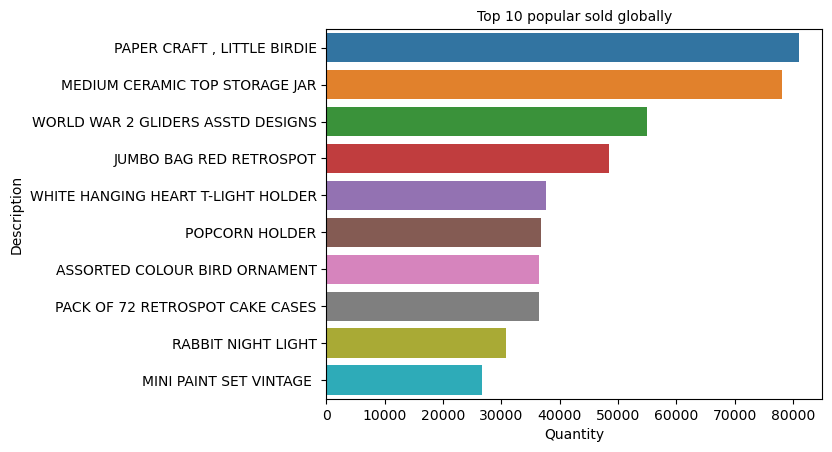

In [13]:
global_popular.reset_index(inplace =True)
sns.barplot(x='Quantity',y='Description',data=global_popular.head(10))
plt.title('Top 10 popular sold globally',fontsize=10)

In [18]:
#Items sold countrywise
#pivoting to get top products by quantity and country
popular_country=data_clean.pivot_table(index=['Country','StockCode','Description'], values='Quantity', aggfunc='sum').reset_index()
print('Top 10 products sold by country')
popular_country.head(10)

Top 10 products sold by country


,Country,StockCode,Description,Quantity
0,Australia,15036,ASSORTED COLOURS SILK FAN,600
1,Australia,15056BL,EDWARDIAN PARASOL BLACK,3
2,Australia,16161P,WRAP ENGLISH ROSE,400
3,Australia,16169E,WRAP 50'S CHRISTMAS,25
4,Australia,20665,RED RETROSPOT PURSE,6
5,Australia,20675,BLUE POLKADOT BOWL,216
6,Australia,20676,RED RETROSPOT BOWL,216
7,Australia,20677,PINK POLKADOT BOWL,216
8,Australia,20685,DOORMAT RED RETROSPOT,50
9,Australia,20711,JUMBO BAG TOYS,100


Text(0.5, 1.0, 'Top 10 Most Popular Items in UK')

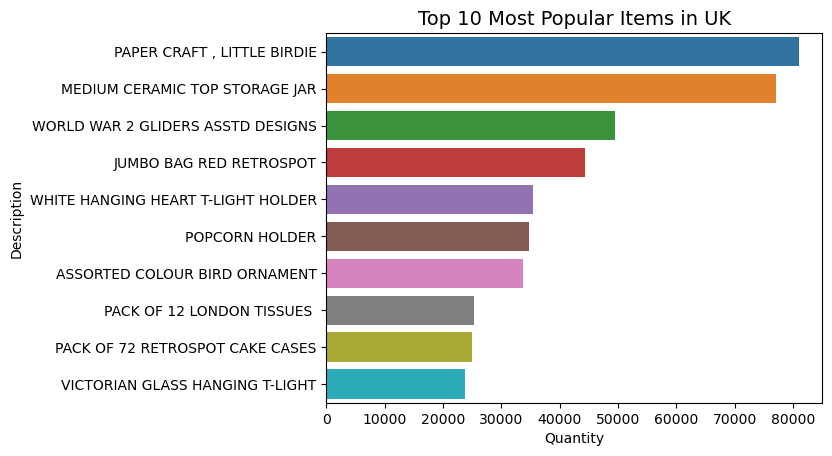

In [21]:
sns.barplot(y='Description', x='Quantity', data=popular_country[popular_country['Country']=='United Kingdom'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in UK', fontsize=14)

Text(0.5, 1.0, 'Top 10 Most Popular Items in Netherlands')

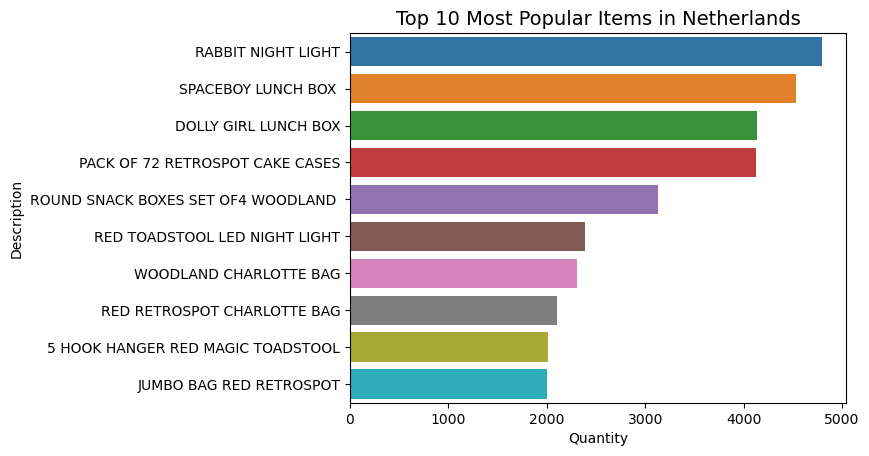

In [24]:
sns.barplot(y='Description', x='Quantity', data=popular_country[popular_country['Country']=='Netherlands'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in Netherlands', fontsize=14)

Text(0.5, 1.0, 'Top 10 Most Popular Items in EIRE')

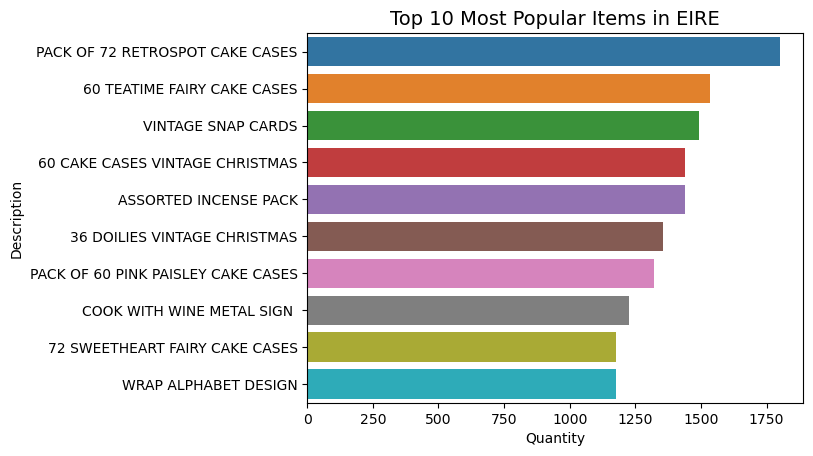

In [26]:
sns.barplot(y='Description', x='Quantity', data=popular_country[popular_country['Country']=='EIRE'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in EIRE', fontsize=14)

Text(0.5, 1.0, 'Top 10 Most Popular Items in Germany')

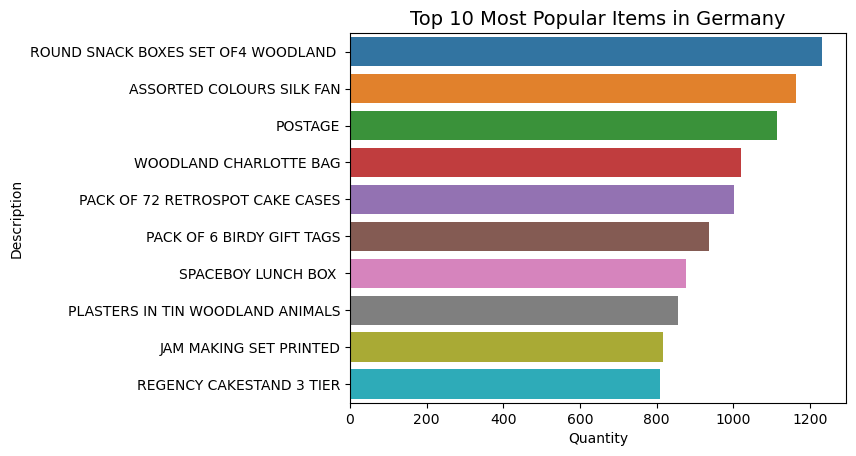

In [29]:
sns.barplot(y='Description', x='Quantity', data=popular_country[popular_country['Country']=='Germany'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in Germany', fontsize=14)

### Item popularity by Month

In [30]:
import datetime

In [33]:
data_clean['InvoiceDate'] = pd.to_datetime(data_clean.InvoiceDate, format='%m/%d/%Y %H:%M')
data_clean.insert(loc=2, column= 'year_month', value=data_clean['InvoiceDate'].map(lambda x: 100*x.year + x.month))
data_clean.insert(loc=3, column= 'month',value= data_clean.InvoiceDate.dt.month)
data_clean.insert(loc=4, column= 'day', value=(data_clean.InvoiceDate.dt.dayofweek)+1)
data_clean.insert(loc=5, column = 'hour', value=data_clean.InvoiceDate.dt.hour)

Text(0.5, 1.0, 'Top 10 Most Popular Items during December 2010')

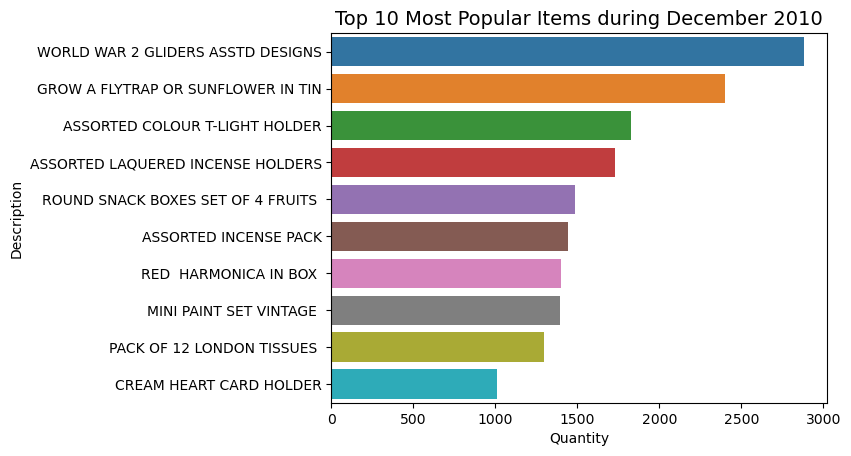

In [36]:
#viz - popular items by month
sns.barplot(y='Description', x='Quantity', data=data_clean[data_clean['year_month']==201012].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during December 2010', fontsize=14)

Text(0.5, 1.0, 'Popular items during january 2011')

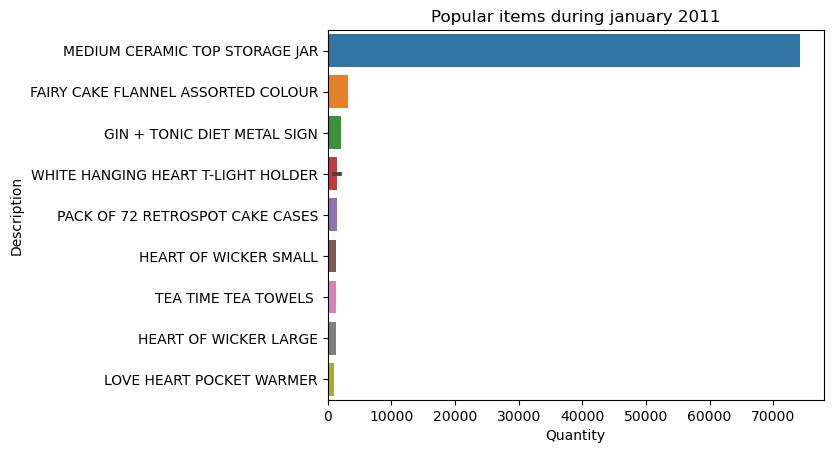

In [38]:
sns.barplot(x='Quantity', y='Description', data=data_clean[data_clean['year_month']==201101].sort_values(by='Quantity',ascending=False).head(10))
plt.title('Popular items during january 2011')

Text(0.5, 1.0, 'Popular items during febuary 2011')

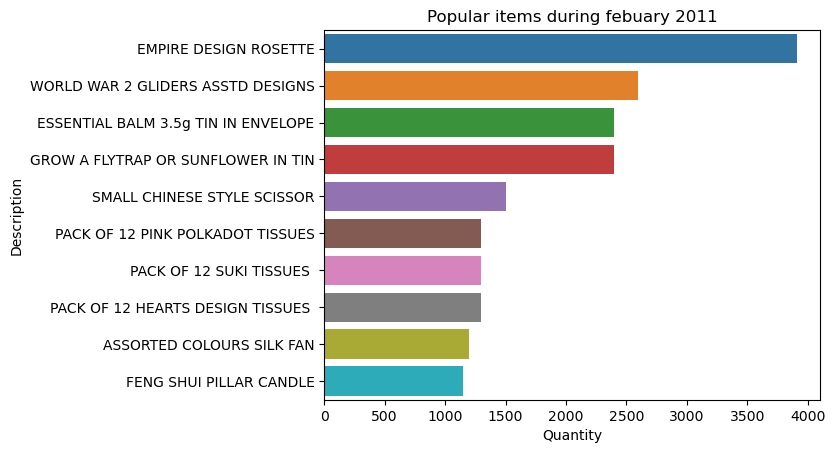

In [39]:
sns.barplot(x='Quantity', y='Description', data=data_clean[data_clean['year_month']==201102].sort_values(by='Quantity',ascending=False).head(10))
plt.title('Popular items during febuary 2011')

Text(0.5, 1.0, 'Popular items during march 2011')

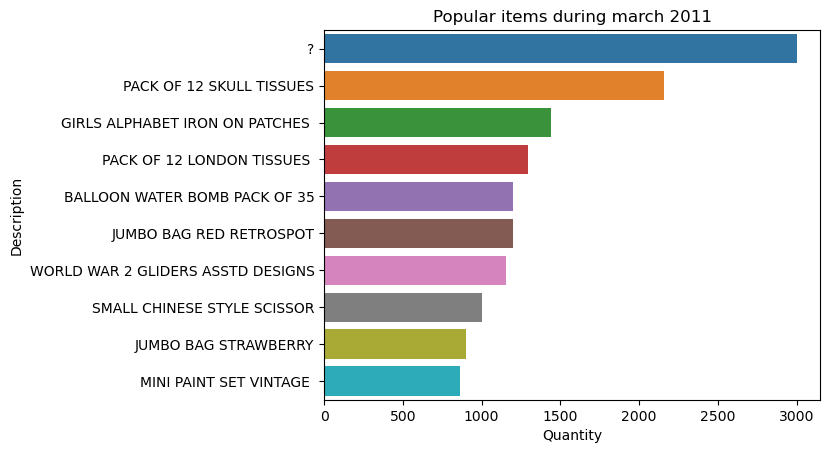

In [40]:
sns.barplot(x='Quantity', y='Description', data=data_clean[data_clean['year_month']==201103].sort_values(by='Quantity',ascending=False).head(10))
plt.title('Popular items during march 2011')

### Buy it again recommendation

In [41]:
from collections import Counter

# Extracting all the items bought by customer 17850
desc = data_clean[data_clean['CustomerID']==17850].Description

# Counting the number of times that purchase has been repeated
count = Counter(desc)

# Counter sorts the items in descending order of purchased count

# Printing the count
print(count)

Counter({'WHITE HANGING HEART T-LIGHT HOLDER': 17, 'WHITE METAL LANTERN': 17, 'KNITTED UNION FLAG HOT WATER BOTTLE': 17, 'RED WOOLLY HOTTIE WHITE HEART.': 17, 'GLASS STAR FROSTED T-LIGHT HOLDER': 17, 'HAND WARMER UNION JACK': 17, 'HAND WARMER RED POLKA DOT': 17, 'SET 7 BABUSHKA NESTING BOXES': 16, 'CREAM CUPID HEARTS COAT HANGER': 15, 'RETRO COFFEE MUGS ASSORTED': 15, 'VINTAGE BILLBOARD DRINK ME MUG': 15, 'VINTAGE BILLBOARD LOVE/HATE MUG': 15, 'WOOD 2 DRAWER CABINET WHITE FINISH': 15, 'WOODEN PICTURE FRAME WHITE FINISH': 15, 'WOODEN FRAME ANTIQUE WHITE ': 15, 'SAVE THE PLANET MUG': 14, 'WOOD S/3 CABINET ANT WHITE FINISH': 14, 'JUMBO SHOPPER VINTAGE RED PAISLEY': 10, 'IVORY EMBROIDERED QUILT ': 8, 'EDWARDIAN PARASOL RED': 7, 'EDWARDIAN PARASOL BLACK': 4})


In [44]:
def buy_again(customerid):
    
    # Fetching the items bought by the customer for provided customer id
    items_bought = data_clean[data_clean['CustomerID']==customerid].Description
    
    # Count and sort the repeated purchases
    bought_again = Counter(items_bought)
    
    # Convert counter to list for printing recommendations
    buy_again_list = list(bought_again)
    
    # Printing the recommendations
    print('Items you would like to buy again :')
    return(buy_again_list)

In [45]:
buy_again(17850)

Items you would like to buy again :


['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'EDWARDIAN PARASOL RED',
 'RETRO COFFEE MUGS ASSORTED',
 'SAVE THE PLANET MUG',
 'VINTAGE BILLBOARD DRINK ME MUG',
 'VINTAGE BILLBOARD LOVE/HATE MUG',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'WOOD S/3 CABINET ANT WHITE FINISH',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'EDWARDIAN PARASOL BLACK',
 'IVORY EMBROIDERED QUILT ',
 'JUMBO SHOPPER VINTAGE RED PAISLEY']

In [46]:
buy_again(17892)

Items you would like to buy again :


['SET/4 COLOURFUL MIXING BOWLS',
 'STRAWBERRY RAFFIA FOOD COVER',
 'RED ENCHANTED FOREST PLACEMAT',
 'OVEN MITT APPLES DESIGN',
 'AIRLINE BAG VINTAGE JET SET WHITE',
 'AGED GLASS SILVER T-LIGHT HOLDER',
 'FRENCH ENAMEL POT W LID',
 'SET OF 3 CAKE TINS SKETCHBOOK',
 'SPACE CADET RED',
 'SPACE CADET WHITE',
 'SPACE FROG',
 'SPACE OWL',
 'DELUXE SEWING KIT ',
 '12 MESSAGE CARDS WITH ENVELOPES',
 'GOLD MINI TAPE MEASURE ',
 'ENVELOPE 50 BLOSSOM IMAGES',
 'CLASSIC FRENCH STYLE BASKET NATURAL',
 'PINK CREAM FELT CRAFT TRINKET BOX ',
 'SMALL ZINC/GLASS CANDLEHOLDER',
 'SET OF 6 T-LIGHTS CACTI ',
 'LED TEA LIGHTS',
 'TWO DOOR CURIO CABINET',
 'FAMILY ALBUM WHITE PICTURE FRAME',
 'PICTURE FRAME WOOD TRIPLE PORTRAIT',
 'SILVER HANGING T-LIGHT HOLDER',
 'REX CASH+CARRY JUMBO SHOPPER',
 'PIGGY BANK RETROSPOT ']